# 6 矩阵

## 6.1 矩阵置零

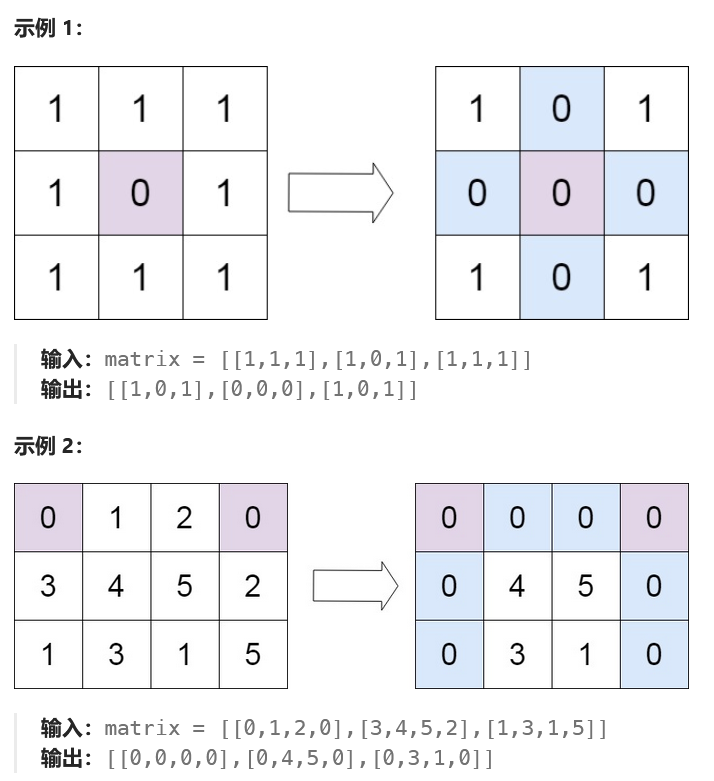

In [ ]:
class Solution:
    def setZeroes(self, matrix: List[List[int]]) -> None:
        """
        Do not return anything, modify matrix in-place instead.
        """
        m = len(matrix)
        n = len(matrix[0])
        # 定义两个常数变量，记录第一行、第一列是否有原始0
        row0_has_zero = False
        col0_has_zero = False

        # 步骤1：检查第一行是否有0
        for j in range(n):
            if matrix[0][j] == 0:
                row0_has_zero = True
                break
        
        # 步骤1：检查第一列是否有0
        for i in range(m):
            if matrix[i][0] == 0:
                col0_has_zero = True
                break

        # 步骤2：从i=1,j=1开始遍历，用首行首列做标记
        for i in range(1, m):
            for j in range(1, n):
                if matrix[i][j] == 0:
                    matrix[i][0] = 0  # 标记第i行需要置零
                    matrix[0][j] = 0  # 标记第j列需要置零

        # 步骤3：根据标记，置零非首行首列的位置
        for i in range(1, m):
            for j in range(1, n):
                if matrix[i][0] == 0 or matrix[0][j] == 0:
                    matrix[i][j] = 0

        # 步骤4：处理首行和首列的置零
        if row0_has_zero:
            for j in range(n):
                matrix[0][j] = 0
        
        if col0_has_zero:
            for i in range(m):
                matrix[i][0] = 0

## 6.1 螺旋矩阵

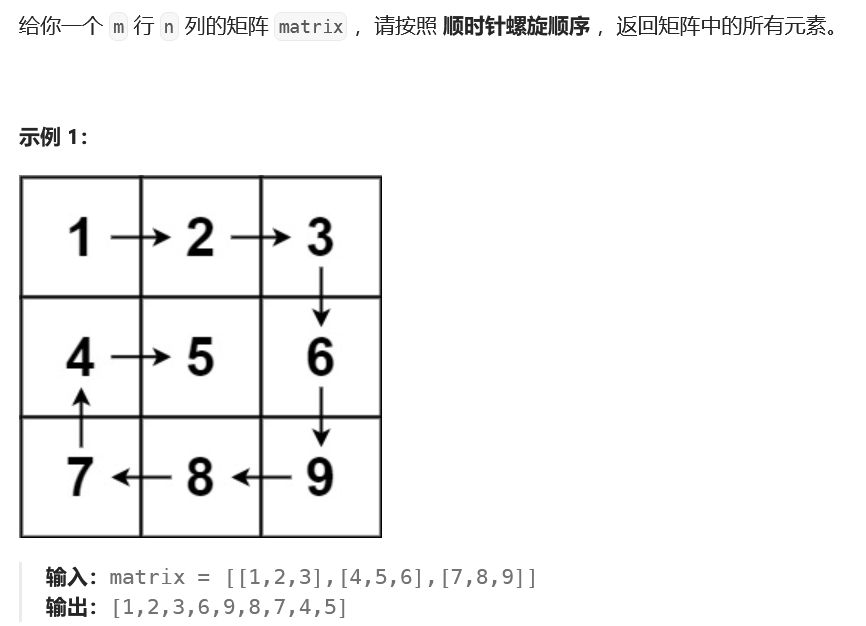

In [ ]:
class Solution:
    def spiralOrder(self, matrix: List[List[int]]) -> List[int]:
        if not matrix:  # 处理空矩阵的特殊情况
            return []
        res = []
        # 初始化4个边界
        top, bottom = 0, len(matrix) - 1
        left, right = 0, len(matrix[0]) - 1
        
        while top <= bottom and left <= right:
            # 1. 从左到右：遍历上边界
            for col in range(left, right + 1):
                res.append(matrix[top][col])
            top += 1
            
            # 2. 从上到下：遍历右边界
            for row in range(top, bottom + 1):
                res.append(matrix[row][right])
            right -= 1
            
            # 边界可能已经交叉，需要判断后再继续遍历
            if top <= bottom:
                # 3. 从右到左：遍历下边界
                for col in range(right, left - 1, -1):
                    res.append(matrix[bottom][col])
                bottom -= 1
            
            # 边界可能已经交叉，需要判断后再继续遍历
            if left <= right:
                # 4. 从下到上：遍历左边界
                for row in range(bottom, top - 1, -1):
                    res.append(matrix[row][left])
                left += 1
        return res

## 6.3 旋转图像

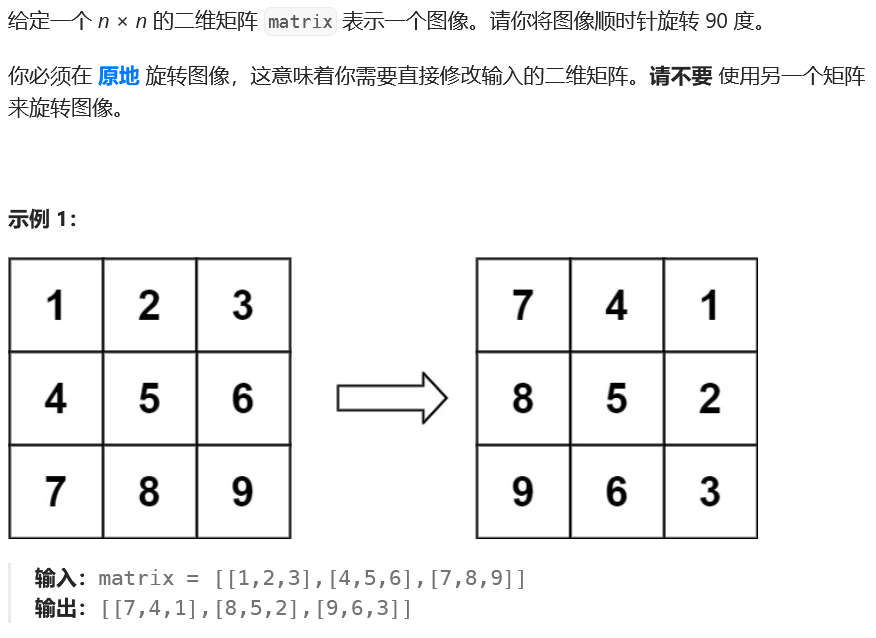

In [ ]:
class Solution:
    def rotate(self, matrix: List[List[int]]) -> None:
        """
        Do not return anything, modify matrix in-place instead.
        """
        n = len(matrix)
        # 步骤1：主对角线 矩阵转置 (i < j 避免重复交换)
        for i in range(n):
            for j in range(i, n):
                matrix[i][j], matrix[j][i] = matrix[j][i], matrix[i][j]
        
        # 步骤2：对每一行进行水平翻转
        for i in range(n):
            matrix[i] = matrix[i][::-1]  # Python切片反转，简洁高效

## 6.4 搜索二维矩阵 II

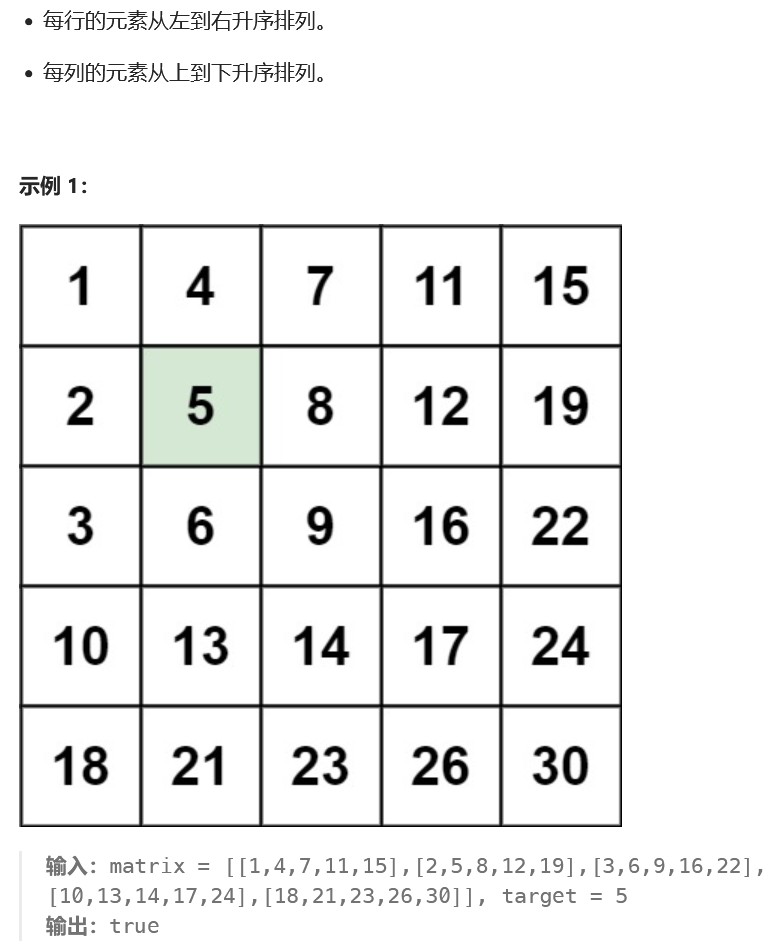

In [ ]:
class Solution:
    def searchMatrix(self, matrix: List[List[int]], target: int) -> bool:
        # 处理空矩阵的边界情况
        if not matrix or not matrix[0]:
            return False
        m = len(matrix)   # 矩阵的行数
        n = len(matrix[0])# 矩阵的列数
        i, j = 0, n-1     # 初始指针：右上角
        
        while i < m and j >= 0:
            if matrix[i][j] == target:
                return True
            elif matrix[i][j] > target:
                j -= 1    # 大了，向左走
            else:
                i += 1    # 小了，向下走
        # 越界说明没找到
        return False